In [14]:
# capture coordinate stacking with a single small layer

In [23]:
# no noise or small noise
m = 10000
X = randn(m, 2)
X[:,0] = X[:,0] > 0
y = X[:,1] * X[:,0] - X[:,1] * (1 - X[:,0])

# X[:,0] = 0

y = np.atleast_2d(y).T
y.shape, X.shape

((10000, 1), (10000, 2))

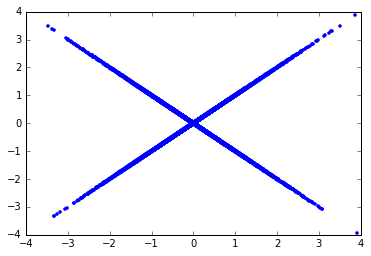

In [24]:
%matplotlib inline
plot(X[:,1], y, '.')
show()

In [25]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [26]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [2, 2, 2]
# dropout = 0.01

model = Sequential()
model.add(Dense(input_dim=m, output_dim=dims[0], init='glorot_uniform'))
model.add(Activation('tanh')) # relu not exist?
# model.add(Dropout(dropout))
# model.add(Dense(input_dim=dims[0], output_dim=dims[1], init='glorot_uniform'))
# model.add(Activation('tanh'))
# model.add(Dropout(dropout))
# model.add(Dense(input_dim=dims[1], output_dim=dims[2], init='glorot_uniform'))
# model.add(Activation('tanh'))
# model.add(Dropout(dropout))
model.add(Dense(input_dim=dims[2], output_dim=n, init='glorot_uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.1, decay=1e-4, momentum=0.5, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

In [27]:
out = model.fit(X_train, y_train, nb_epoch=30, batch_size=256, validation_data=(X_test, y_test), show_accuracy=True)

Train on 9000 samples, validate on 1000 samples
Epoch 1/30
9000/9000 [==============================] - 0s - loss: 0.8372 - acc: 1.0000 - val_loss: 0.6326 - val_acc: 1.0000
Epoch 2/30
9000/9000 [==============================] - 0s - loss: 0.4292 - acc: 1.0000 - val_loss: 0.2692 - val_acc: 1.0000
Epoch 3/30
9000/9000 [==============================] - 0s - loss: 0.1531 - acc: 1.0000 - val_loss: 0.1031 - val_acc: 1.0000
Epoch 4/30
9000/9000 [==============================] - 0s - loss: 0.0610 - acc: 1.0000 - val_loss: 0.0556 - val_acc: 1.0000
Epoch 5/30
9000/9000 [==============================] - 0s - loss: 0.0358 - acc: 1.0000 - val_loss: 0.0398 - val_acc: 1.0000
Epoch 6/30
9000/9000 [==============================] - 0s - loss: 0.0265 - acc: 1.0000 - val_loss: 0.0303 - val_acc: 1.0000
Epoch 7/30
9000/9000 [==============================] - 0s - loss: 0.0220 - acc: 1.0000 - val_loss: 0.0254 - val_acc: 1.0000
Epoch 8/30
9000/9000 [==============================] - 0s - loss: 0.0187 - a

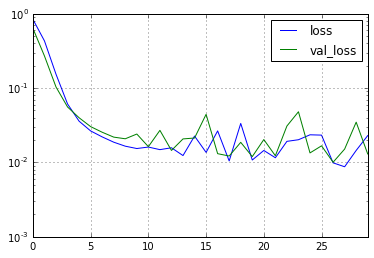

In [28]:
h = pandas.DataFrame(out.history)
h[['loss', 'val_loss']].plot(logy=True)
grid()

In [29]:
mse = lambda x: np.mean(x ** 2)
yp = model.predict(X_train)
ypt = model.predict(X_test)

res = dict(base=mse(y_train - np.mean(y_train)), train=mse(y_train - yp), test=mse(y_test - ypt))
res

{'base': 0.97309457315670667,
 'test': 0.012976583112894683,
 'train': 0.011681779040954467}

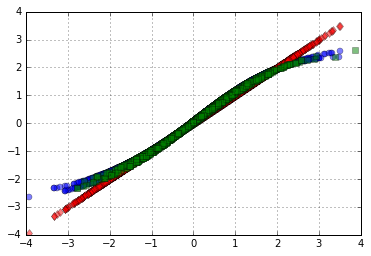

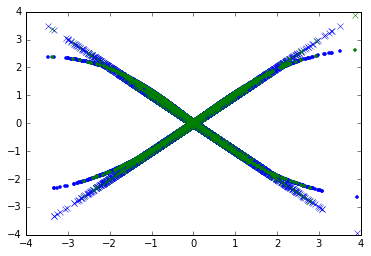

In [30]:
def do_pred_plot(X, y, Xt, yt):
    yp = model.predict(X)
    ypt = model.predict(Xt)
    %matplotlib inline
    for i in range(yp.shape[1]):
        figure()
        clf()
        plot(y[:,i], yp[:,i], 'o', alpha=0.5, label='')
        plot(y[:,i], y[:,i], 'rd', alpha=0.5)
        plot(yt[:,i], ypt[:,i], 'gs', alpha=0.5)
        grid()
    figure()
    plot(X_train[:,1], yp, 'b.')
    plot(X_train[:,1], y_train, 'bx')
    plot(X_test[:,1], ypt, 'g.')
    plot(X_test[:,1], y_test, 'gx')
 
do_pred_plot(X_train, y_train, X_test, y_test)